# SECTION A
**IMPORT LIBRARIES**

In [340]:
import numpy as np
import pandas as pd
import csv
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [341]:
df = pd.read_csv("hotel_bookings.csv")

In [342]:
df.shape

(119390, 32)

In [343]:
#check for duplicates
df[df.duplicated(keep=False)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
21,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,No Deposit,250.0,NaN,0,Transient,84.67,0,1,Check-Out,2015-07-07
39,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,No Deposit,250.0,NaN,0,Transient,137.00,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,195.33,0,2,Check-Out,2017-09-03
119372,City Hotel,0,175,2017,August,35,31,1,3,1,...,No Deposit,42.0,NaN,0,Transient,82.35,0,1,Check-Out,2017-09-04


In [344]:
#Get percentage of NA data for each attribute
(df.isna().sum()/df.shape[0])*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

# SECTION B
**DATA CLEAN UP**

In [345]:
df.drop_duplicates(inplace=True)

#as the attributes 'agent' and 'company' NA data makes up more than 10% of the total number of rows in the dataframe,
#the columns agent and company will be removed

#as the attribute 'country' has 0.4% of data that have NA values and is a categorical value,
#the mode of the column will be used to fill the NA values. 

def dropColumn(frame,columnName):
    frame.drop([columnName],axis=1,inplace=True)

def getMode(frame,column):
    mode = frame[column].mode()[0]
    return mode

def fillNAvaluesWith(frame,column,mode):
    frame[column].fillna(mode,inplace=True)

dropColumn(df,'company')
dropColumn(df,'agent')

fillNAvaluesWith(df,'country',getMode(df,'country'))
fillNAvaluesWith(df,'children',getMode(df,'children'))


Change rows with Undefined in their respective columns to the Mode or equivalent

In [346]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list              

In [347]:
def checkUniqueCounts(column):
    print(df[column].value_counts(), "\n")

print(checkUniqueCounts('meal'))
print(checkUniqueCounts('market_segment'))
print(checkUniqueCounts('distribution_channel'))

BB           67978
SC            9481
HB            9085
Undefined      492
FB             360
Name: meal, dtype: int64 

None
Online TA        51618
Offline TA/TO    13889
Direct           11804
Groups            4942
Corporate         4212
Complementary      702
Aviation           227
Undefined            2
Name: market_segment, dtype: int64 

None
TA/TO        69141
Direct       12988
Corporate     5081
GDS            181
Undefined        5
Name: distribution_channel, dtype: int64 

None


In [348]:
#In the Hotel Booking metadata, Undefined is also SC. Hence, change all Undefined to SC
df['meal'].replace('Undefined','SC',inplace=True)

#Change all Undefined in 'market_segment' and 'distribution_channel' to the Mode of the attribute
def changeValuesToMode(frame,column):
    frame[column].replace('Undefined',getMode(frame,column),inplace=True)
    
changeValuesToMode(df,'market_segment')
changeValuesToMode(df,'distribution_channel')

# SECTION B2: 
**CREATE NEW COLUMNS FOR DATA EXPLORATORY**

In [349]:
#change column 'reservation_status_date' to datetime attribute
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

#change column int type to string type
def changeTypeToString(frame,column):
    frame[column] = frame[column].astype(str)
    
changeTypeToString(df,'arrival_date_year')
changeTypeToString(df,'arrival_date_day_of_month')

#create new column to consolidate all arrival day,month and year
def manageArrivalDates(frame):
    arrival_date = ['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']
    frame['arrival_date'] = pd.to_datetime(frame[arrival_date].agg('-'.join,axis=1),format='%Y-%B-%d')
    return frame['arrival_date']

df['arrival_date'] = manageArrivalDates(df)

#Get Booking Date with Arrival Date and counting back using the Lead_time
df['booking_date'] = df['arrival_date'] - pd.to_timedelta(df['lead_time'],unit="days")

# SECTION C:
**DATA EXPLORATORY**

In [350]:
def countValuesInAttribute(frame,column):
    return frame[column].value_counts()

def countProportionsInAttribute(frame,column):
    return frame[column].value_counts(normalize=True)

def getColumnCountOf(frame,column,condition):
    return len(frame[frame[column]==condition])

def getDfLen(df):
    return len(df)

def getProportions(item,total):
    return (item/total)*100

def formatFloatToTwoDP(dec):
    return "{:.2f}%".format(dec)

def getCancelledBookingDF(frame,hotelName):
    return frame[(frame['hotel']==hotelName)&(frame['is_canceled']==1)]

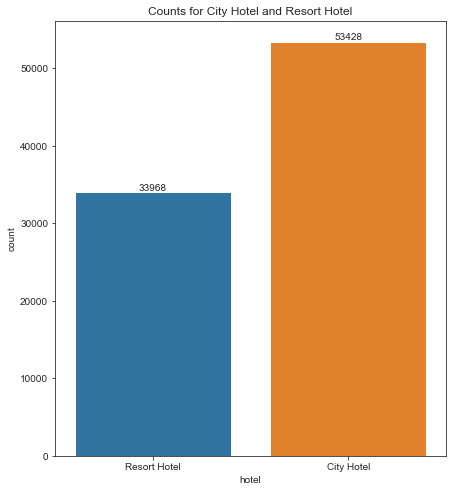

In [351]:
plt.figure(figsize=(7,8))
ax = sns.countplot(data= df, x='hotel')
for label in ax.containers:
    ax.bar_label(label)
plt.title("Counts for City Hotel and Resort Hotel")
plt.show()


###  SECTION C.1: 
##### WHAT PROPORTION OF BOOKINGS ARE CANCELED IN EACH HOTEL AND FOR EACH YEAR (if applicable)?


In [352]:
#extract year into a new column
df['booking_date_year'] = pd.DatetimeIndex(df['booking_date']).year

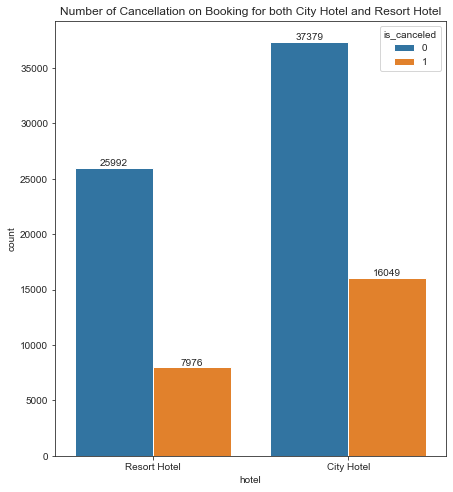

In [353]:
plt.figure(figsize=(7,8))
ax1 = sns.countplot(data= df, x='hotel',hue='is_canceled')
for label in ax1.containers:
    ax1.bar_label(label)
plt.title("Number of Cancellation on Booking for both City Hotel and Resort Hotel")
plt.show()

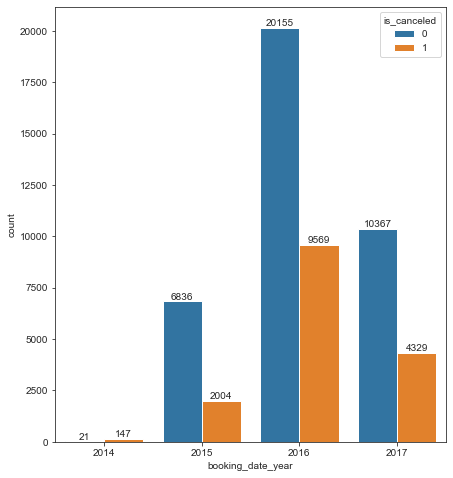

In [354]:
plt.figure(figsize=(7,8))
ax3 = sns.countplot(data=df[df['hotel']=='City Hotel'], x='booking_date_year',hue='is_canceled')
for label in ax3.containers:
    ax3.bar_label(label)
plt.show()

In [355]:
#Proportion of bookings that were cancelled for City Hotel
df_cityHotel_Cancelled = getCancelledBookingDF(df,'City Hotel')
numberOfBookingCityHotel = getColumnCountOf(df,'hotel','City Hotel')
proportion1 = getProportions(getDfLen(df_cityHotel_Cancelled),numberOfBookingCityHotel)
print("Proportion of bookings that were cancelled for City Hotel:", formatFloatToTwoDP(proportion1))

#Proportion of bookings that were cancelled for City Hotel
df_resortHotel_Cancelled = getCancelledBookingDF(df,'Resort Hotel')
numberOfBookingResortHotel = getColumnCountOf(df,'hotel','Resort Hotel')
proportion2 = getProportions(getDfLen(df_resortHotel_Cancelled),numberOfBookingResortHotel)
print("Proportion of bookings that were cancelled for Resort Hotel:", formatFloatToTwoDP(proportion2))

Proportion of bookings that were cancelled for City Hotel: 30.04%
Proportion of bookings that were cancelled for Resort Hotel: 23.48%


There were more bookings that were cancelled for City Hotel.

In [356]:
def groupByYearInEachHotel(frame):
    return frame.groupby(['booking_date_year'])['is_canceled'].count()

def getProportionofBookingsThatWereCanceledInEachYear(eachHotel,total):
    proportionArrayCancelled = []
    yearsRecorded = []
    for i in total.index:
        if i in eachHotel.index:
            yearsRecorded.append(i)
            cancelledProportion = (eachHotel[i]/total[i])*100
            proportionArrayCancelled.append(cancelledProportion) #append into array to plot in a pie chart
            print("Proportion of Bookings made that were cancelled in the year",i,"is",formatFloatToTwoDP(cancelledProportion))
        else:
            print("There were no cancellations made in the year", i)
    return yearsRecorded,proportionArrayCancelled

def obtainNonCancelledBookings(cancelledArray):
    notCancelledArray = []
    for i in cancelledArray:
        notCancelledArray.append(100-i)
    return notCancelledArray


**Proportion of Bookings made for Resort Hotels that were cancelled in each respective year**

In [357]:
def createPieChartObj(yearIndex):
    obj = "ax"+str(yearIndex+1)
    return globals()[obj]

def plotPieForBookingProportionsPerYear(frame):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(7,8))
    labels = frame['is_canceled'].unique()
    return ax1,ax2,ax3,ax4,labels

def createArrayForEachPie(cancelled,indexA,notcancelled,indexB):
    return [notcancelled[indexB],cancelled[indexA]]

In [358]:
# Number of Canceled Bookings in Resort Hotel for each year
numberOfCanceledBookingsEachYearResort = groupByYearInEachHotel(df_resortHotel_Cancelled)

# Number of Total Bookings in Resort Hotel for each year
totalBookingsEachYearResort = groupByYearInEachHotel(df[df['hotel']=='Resort Hotel'])

yearsRecorded, proportionArrayCancelled = getProportionofBookingsThatWereCanceledInEachYear(numberOfCanceledBookingsEachYearResort,totalBookingsEachYearResort)

# Number of NON Canceled Bookings in City Hotel for each year
proportionArrayNotCancelled = obtainNonCancelledBookings(proportionArrayCancelled)

There were no cancellations made in the year 2013
Proportion of Bookings made that were cancelled in the year 2014 is 42.61%
Proportion of Bookings made that were cancelled in the year 2015 is 20.47%
Proportion of Bookings made that were cancelled in the year 2016 is 24.33%
Proportion of Bookings made that were cancelled in the year 2017 is 24.77%


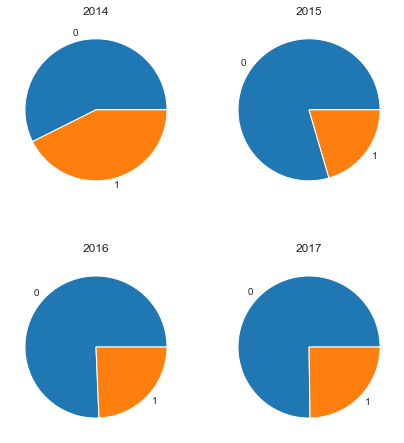

In [359]:
ax1,ax2,ax3,ax4,label = plotPieForBookingProportionsPerYear(df)

for j in range(len(yearsRecorded)):
    arrayForEachPie = createArrayForEachPie(proportionArrayCancelled,j,proportionArrayNotCancelled,j)
    obj = createPieChartObj(j)
    obj.pie(arrayForEachPie,labels=label)
    obj.set_title(yearsRecorded[j])

**Proportion of Bookings made for City Hotels that were cancelled in each respective year**

In [360]:
numberOfCanceledBookingsEachYearResort

booking_date_year
2014      49
2015    1837
2016    4022
2017    2068
Name: is_canceled, dtype: int64

In [361]:
totalBookingsEachYearResort

booking_date_year
2013        1
2014      115
2015     8973
2016    16530
2017     8349
Name: is_canceled, dtype: int64

In [362]:
# Number of Canceled Bookings in City Hotel for each year
numberOfCanceledBookingsEachYearResort = groupByYearInEachHotel(df_cityHotel_Cancelled)

# Number of Total Bookings in City Hotel for each year
totalBookingsEachYearResort = groupByYearInEachHotel(df[df['hotel']=='City Hotel'])

yearsRecorded, proportionArrayCancelled = getProportionofBookingsThatWereCanceledInEachYear(numberOfCanceledBookingsEachYearResort,totalBookingsEachYearResort)

# Number of NON Canceled Bookings in City Hotel for each year
proportionArrayNotCancelled = obtainNonCancelledBookings(proportionArrayCancelled)

Proportion of Bookings made that were cancelled in the year 2014 is 87.50%
Proportion of Bookings made that were cancelled in the year 2015 is 22.67%
Proportion of Bookings made that were cancelled in the year 2016 is 32.19%
Proportion of Bookings made that were cancelled in the year 2017 is 29.46%


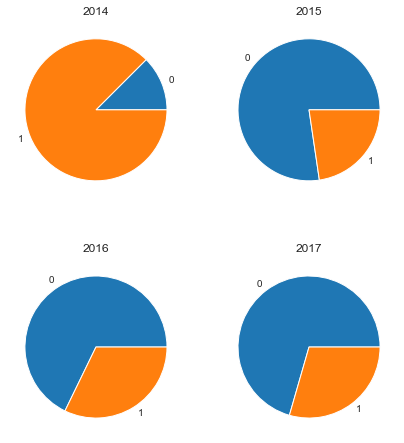

In [363]:
ax1,ax2,ax3,ax4,label = plotPieForBookingProportionsPerYear(df)

for j in range(len(yearsRecorded)):
    arrayForEachPie = createArrayForEachPie(proportionArrayCancelled,j,proportionArrayNotCancelled,j)
    obj = createPieChartObj(j)
    obj.pie(arrayForEachPie,labels=label)
    obj.set_title(yearsRecorded[j])

*Analysis:*

*There is a greater number of cancelled bookings for both city and resort hotels for the year 2016, and especially more for City Hotel. However, if we look further into the proportion of bookings (in %) that were cancelled in each hotel and years, we are able to see that 2014 has a greater proportion of bookings that were cancelled. This could be due to the fact there were not enough data for the year 2014.*

*Hence, with that being said, there were more bookings cancelled in 2016 for City Hotels. There are also more bookings cancelled in 2016 and 2017 for resort hotels, with 2017 just slightly higher than 2016.*



### SECTION C.2 
##### WHAT IS THE MOST FREQUENT LEAD TIME AT WHICH CANCELLATIONS OCCURS?

In [364]:
def plotHistForLeadTime(frame):
    plt.figure(figsize=(7,8))
    ax = sns.histplot(data=frame,x="lead_time",binwidth=100)
    for label in ax.containers:
        ax.bar_label(label)
    plt.title("Cancellations Counts for Lead Time ranges")

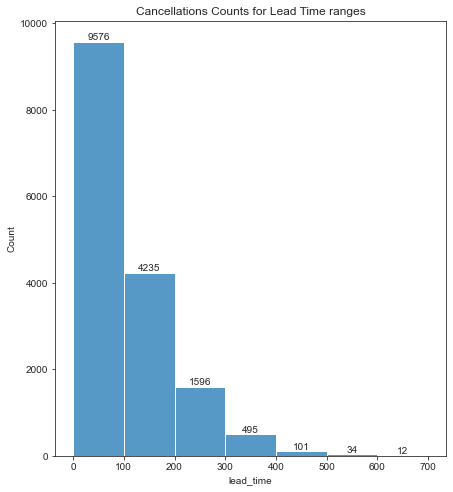

In [365]:
#Cancellation Counts for Lead Time ranges for City Hotels
plotHistForLeadTime(df_cityHotel_Cancelled)

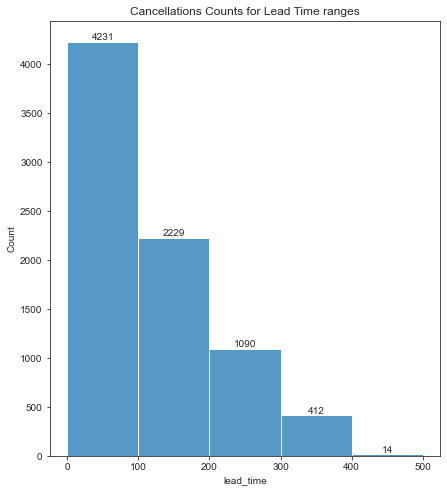

In [366]:
#Cancellation Counts for Lead Time ranges for Resort Hotels
plotHistForLeadTime(df_resortHotel_Cancelled)

*Analysis:*

*Generally speaking, lead time of 0-100 days have a higher change of cancellations for both hotels.*

*Potential Business Approach: Hotels can pay more attention to bookings that have 100 days or less lead time and produce customer retention strategies to prevent cancellation of bookings*



### SECTION C.3
###### WHAT IS THE AVERAGE DAILY RATE TRANSACTION FOR EACH RECORDED BOOKING ACROSS THE YEARS FOR EACH HOTEL?

In [367]:
def separateHotelDF(frame,hoteltype):
    return frame[frame['hotel']==hoteltype].reset_index()

def getHotelAdr(hotelDF):
    return hotelDF.groupby('reservation_status_date')[['adr']].mean()

In [368]:
df_cityhotels = separateHotelDF(df,'City Hotel')
df_resorthotels = separateHotelDF(df,'Resort Hotel')

In [369]:
df_cityhotels_adr = getHotelAdr(df_cityhotels)
df_resorthotels_adr = getHotelAdr(df_resorthotels)

In [370]:
def plotADRLine(cityhotel,resorthotel):
    plt.figure(figsize = (20,8))
    plt.plot(cityhotel.index,cityhotel['adr'],label = 'City Hotel')
    plt.plot(resorthotel.index,resorthotel['adr'],label = 'Resort Hotel')
    plt.legend()
    plt.show()

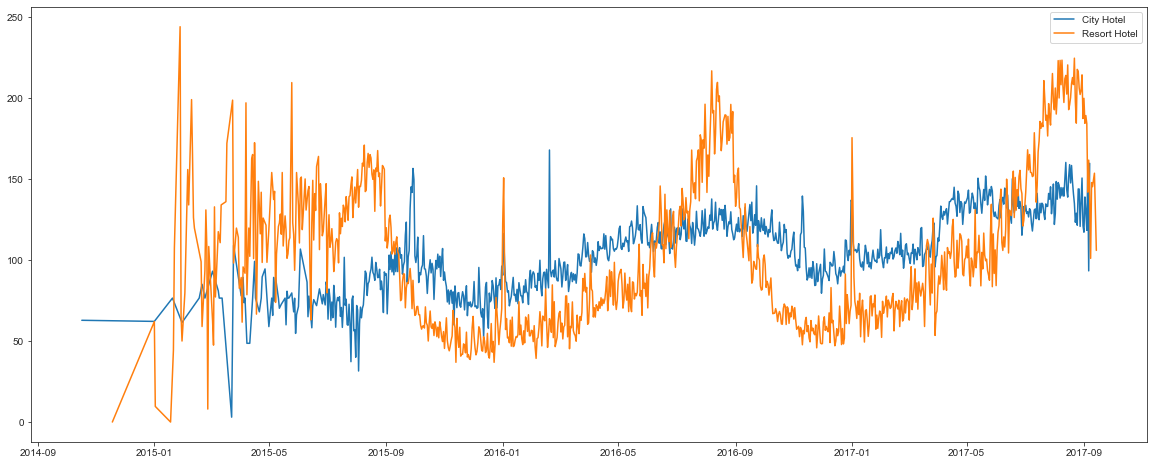

In [371]:
plotADRLine(df_cityhotels_adr,df_resorthotels_adr)

*Analysis:*

*From Section C.1 analysis, we found out that there were more booking cancellations made in the year 2016 for City Hotels, and more booking cancellations made in both 2016 and 2017 for Resort Hotels.*

*This can be reflect on the ADR line graph. It is shown on the line graph that the average daily rate for resort hotels are consistently high in 2016 and 2017 in the 3rd quarter of each year. It was also shown that for city hotels, there was a higher ADR for the year 2016 in the first quarter.*

*ADR can be a reason to why there are high cancellation rate in the corresponding year. It could be due to factors like seasonality or events.*

*Possible Business Approach: Hotels can pay more attention to peak seasons/events as this timing could be prone to booking cancellations. They can produce price strategies so that they may retain guests and prevent cancellations.*
